<a href="https://colab.research.google.com/github/albertopolini/Text-Mining/blob/main/Lab_1/TextMining_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP preprocessing 
- Case Folding
- Remove Numbers, Whitespaces and Punctuation
- Tokenization
- Lemmatization and stemming


# Importing and Installing Libraries

In [ ]:
!pip install wordcloud
import nltk
import os
import string
import collections
import re
import pandas as pd
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import random
nltk.__version__


'3.2.5'

# Downloading Dataset and Models

In [ ]:
nltk.download('punkt')
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

#Loading Twitter Dataset

In [ ]:
tweets = twitter_samples.strings("tweets.20150430-223406.json")
df_tweet = pd.DataFrame(tweets, columns=['text'])

print("Smaple dataset")
print(df_tweet.head(10))
print(f'''Size of dataset {len(df_tweet)}''')

### For string
final_data=' '.join(texts for texts in df_tweet.text)



Smaple dataset
                                                text
0  RT @KirkKus: Indirect cost of the UK being in ...
1  VIDEO: Sturgeon on post-election deals http://...
2  RT @LabourEoin: The economy was growing 3 time...
3  RT @GregLauder: the UKIP east lothian candidat...
4  RT @thesundaypeople: UKIP's housing spokesman ...
5  RT @Nigel_Farage: Make sure you tune in to #As...
6  RT @joannetallis: Ed Milliband is an embarrass...
7  RT @abstex: The FT is backing the Tories. On a...
8  RT @NivenJ1: “@George_Osborne: Ed Miliband pro...
9  LOLZ to Trickle Down Wealth. It's never trickl...
Size of dataset 20000


#Case-Folding

In [ ]:
# For string
Original_text = final_data
Case_folded_text = final_data.lower()

print(f'''Original Text: {Original_text[:200]} \nAfter Case Folding Text: {Case_folded_text[:200]}''')


Original Text: RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY RT @Lab 
After Case Folding Text: rt @kirkkus: indirect cost of the uk being in the eu is estimated to be costing britain £170 billion per year! #betteroffout #ukip video: sturgeon on post-election deals http://t.co/btjwrpbmoy rt @lab


In [ ]:
# For pd dataset
df_tweet.text = df_tweet.text.str.lower()
df_tweet.head(2)

,text
0,rt @kirkkus: indirect cost of the uk being in ...
1,video: sturgeon on post-election deals http://...


# Removal

### URL

In [ ]:
# For string
removed_url_text = re.sub(r'https?://\S+|www.\.\S+', '', Case_folded_text)

print(f'''Original text: {Case_folded_text[:200]} \nAfter Removal of Urls: {removed_url_text[:200]}''')

Original text: rt @kirkkus: indirect cost of the uk being in the eu is estimated to be costing britain £170 billion per year! #betteroffout #ukip video: sturgeon on post-election deals http://t.co/btjwrpbmoy rt @lab 
After Removal of Urls: rt @kirkkus: indirect cost of the uk being in the eu is estimated to be costing britain £170 billion per year! #betteroffout #ukip video: sturgeon on post-election deals  rt @laboureoin: the economy w


In [ ]:
# For pd data

df_tweet.text = df_tweet.text.str.replace(r'https?://\S+|www\.\S+', '', regex=True)
df_tweet.head(2)

,text
0,rt @kirkkus: indirect cost of the uk being in ...
1,video: sturgeon on post-election deals


### Remove Emoji

In [ ]:
#Reference: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
# Example Text

text = "Italy is on 🔥🔥. Lets win!!!!"
remove_emoji(text)

'Italy is on . Lets win!!!!'

In [ ]:
# for string

removed_emoji = remove_emoji(removed_url_text)

print(f'''Original text: {removed_url_text[:100]} \nAfter Removal of Urls: {removed_emoji[:100]}''')


Original text: rt @kirkkus: indirect cost of the uk being in the eu is estimated to be costing britain £170 billion 
After Removal of Urls: rt @kirkkus: indirect cost of the uk being in the eu is estimated to be costing britain £170 billion


In [ ]:
# for pd data

df_tweet.text = df_tweet.text.apply(lambda x: remove_emoji(x))
df_tweet.head(2)

,text
0,rt @kirkkus: indirect cost of the uk being in ...
1,video: sturgeon on post-election deals


### Numbers

In [ ]:
# for a string
removed_numbers=re.sub(r'\d+', '',removed_emoji)
print(f'''Original Text: {removed_emoji[:100]} \nAfter removal of numbers: {removed_numbers[:100]}''')


Original Text: rt @kirkkus: indirect cost of the uk being in the eu is estimated to be costing britain £170 billion 
After removal of numbers: rt @kirkkus: indirect cost of the uk being in the eu is estimated to be costing britain £ billion pe


In [ ]:
# for whole data
df_tweet.text = df_tweet.text.str.replace(r'\d+', '', regex=True)

### Stopwords

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
# for a string
removed_stopwords=remove_stopwords(removed_numbers)
print(f'''Original Text: {removed_numbers[:100]} \nAfter removal of stopwords: {removed_stopwords[:100]}''')


Original Text: rt @kirkkus: indirect cost of the uk being in the eu is estimated to be costing britain £ billion pe 
After removal of stopwords: rt @kirkkus: indirect cost uk eu estimated costing britain £ billion per year! #betteroffout #ukip v


In [ ]:
# for whole data
df_tweet.text = df_tweet.text.apply(lambda text: remove_stopwords(text))
df_tweet.head(2)

,text
0,rt @kirkkus: indirect cost uk eu estimated cos...
1,video: sturgeon post-election deals


### Punctuations

In [ ]:
## Specific to Twitter
PUNCTUATIONS = string.punctuation.replace('#','')

def remove_punctuation(text):
    trans = str.maketrans(dict.fromkeys(PUNCTUATIONS, ' '))
    return text.translate(trans)

In [ ]:
# for a string
removed_punctuation=remove_punctuation(removed_stopwords)
print(f'''Original Text: {removed_stopwords[:200]} \nAfter removal of punctuations: {removed_punctuation[:200]}''')

Original Text: rt @kirkkus: indirect cost uk eu estimated costing britain £ billion per year! #betteroffout #ukip video: sturgeon post-election deals rt @laboureoin: economy growing times faster day david cameron be 
After removal of punctuations: rt  kirkkus  indirect cost uk eu estimated costing britain £ billion per year  #betteroffout #ukip video  sturgeon post election deals rt  laboureoin  economy growing times faster day david cameron be


### Whitespaces

In [ ]:
def remove_whitespaces(text):
    return " ".join(text.split())

In [ ]:
# for a string
removed_whitespaces = remove_whitespaces(removed_punctuation)
print(f'''Original Text: {removed_punctuation[:100]} \nAfter removal of whitespaces: {removed_whitespaces[:100]}''')


Original Text: rt  kirkkus  indirect cost uk eu estimated costing britain £ billion per year  #betteroffout #ukip v 
After removal of whitespaces: rt kirkkus indirect cost uk eu estimated costing britain £ billion per year #betteroffout #ukip vide


In [ ]:
df_tweet.text = df_tweet.text.apply(lambda x: remove_whitespaces(x))

# Tokenization

### WhiteSpace tokenizer

In [ ]:
tokenized_words=removed_whitespaces.split()
print(tokenized_words[:10])

['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£']


### NLTK tokenizer

In [ ]:
from nltk.tokenize import word_tokenize

print(word_tokenize(removed_whitespaces)[:20])


['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£', 'billion', 'per', 'year', '#', 'betteroffout', '#', 'ukip', 'video', 'sturgeon', 'post']


### Punct-based tokenizer

In [ ]:
# Word tokenizer
from nltk.tokenize import wordpunct_tokenize

## We used removed URL text to show the difference
print(wordpunct_tokenize(removed_whitespaces)[:20])


['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£', 'billion', 'per', 'year', '#', 'betteroffout', '#', 'ukip', 'video', 'sturgeon', 'post']


### Example of WordPunct and Word tokenizer

In [ ]:
xx='On google.com, the final score of England is 0:10'

print(word_tokenize(xx))
print(wordpunct_tokenize(xx))

['On', 'google.com', ',', 'the', 'final', 'score', 'of', 'England', 'is', '0:10']
['On', 'google', '.', 'com', ',', 'the', 'final', 'score', 'of', 'England', 'is', '0', ':', '10']


### MWET Tokenizer

In [ ]:
from nltk.tokenize import MWETokenizer
tokenizer=MWETokenizer()
print(tokenizer.tokenize(word_tokenize(removed_whitespaces))[:20])

### Add relation
tokenizer.add_mwe(('darkened','room')) # change according to your text
print(tokenizer.tokenize(word_tokenize(removed_whitespaces))[:20])

['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£', 'billion', 'per', 'year', '#', 'betteroffout', '#', 'ukip', 'video', 'sturgeon', 'post']
['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£', 'billion', 'per', 'year', '#', 'betteroffout', '#', 'ukip', 'video', 'sturgeon', 'post']


### Tweet Tokenizer

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer()
print(tokenizer.tokenize(removed_whitespaces)[:20])

['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£', 'billion', 'per', 'year', '#betteroffout', '#ukip', 'video', 'sturgeon', 'post', 'election', 'deals']


In [ ]:
df_tweet=df_tweet.text.apply(lambda x: tokenizer.tokenize(x))
df_tweet.head(2)

0    [rt, @kirkkus, :, indirect, cost, uk, eu, esti...
1           [video, :, sturgeon, post-election, deals]
Name: text, dtype: object

# Loading other NLTK dataset

In [ ]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
nltk.download('punkt')

raw = movie_reviews.raw()
words = movie_reviews.words()
sents = movie_reviews.sents()
paragraphs = movie_reviews.paras()
print("raw",raw[:100])
print("words",words[0:20])
print("sents",sents[0:10])
print("paragraphs",paragraphs[0:3])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
raw plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 

words ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']
sents [['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ['one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.'], ['what', "'", 's', 'the', 'deal', '?'], ['watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.'], ['.'], ['.'], ['critique', ':', 'a', 'mind', '-', 'f

# Exercise: Most common hashtags

Write a function that finds to 50 most frequently occurring hashtags.

In [ ]:
tokenizer = TweetTokenizer()
df_tweet['tokenized'] = df_tweet.apply(lambda row: tokenizer.tokenize(row['text']), axis=1)

In [ ]:
list_of_hashtags = []

def find_hashtag(r):
  hashtags = [w for w in r['tokenized'] if '#' in w]
  if len(hashtags) > 0:
    list_of_hashtags.extend(hashtags)


df_tweet['hashtags'] = df_tweet.apply(lambda row: find_hashtag(row), axis = 1)

In [ ]:
occurrences = dict(collections.Counter(list_of_hashtags))

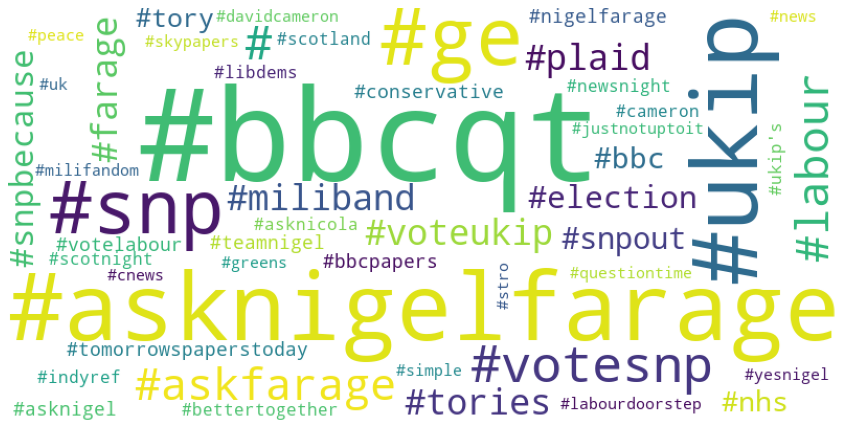

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=50,
                      width=800,height=400,
                      ).generate_from_frequencies(occurrences)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lancaster= LancasterStemmer()


word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football","studies"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             
studies             studi               study               


In [ ]:
# Stemming on the dataset
def stemSentence(token_words):
    stem_text=[]
    for word in token_words:
        stem_text.append(porter.stem(word))
    return stem_text


tokenized_text=tokenizer.tokenize(removed_whitespaces)
stemmed_text=stemSentence(tokenized_text)

print(f'''Tokenzed_text: {tokenized_text[:20]} \nstemmed_text: {stemmed_text[:20]}''')


Tokenzed_text: ['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£', 'billion', 'per', 'year', '#betteroffout', '#ukip', 'video', 'sturgeon', 'post', 'election', 'deals'] 
stemmed_text: ['rt', 'kirkku', 'indirect', 'cost', 'uk', 'eu', 'estim', 'cost', 'britain', '£', 'billion', 'per', 'year', '#betteroffout', '#ukip', 'video', 'sturgeon', 'post', 'elect', 'deal']


#Lemmatizer

In [ ]:
nltk.download('wordnet') 

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


print('Sample of lemmatizations:')
print(wordnet_lemmatizer.lemmatize('dogs'))
print(wordnet_lemmatizer.lemmatize('churches'))
print(wordnet_lemmatizer.lemmatize('growing'))
print(wordnet_lemmatizer.lemmatize('studies'), '\n')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Sample of lemmatizations:
dog
church
growing
study 



In [ ]:
def lemmaSentence(token_words):
    lemma_text=[]
    for word in token_words:
        lemma_text.append(wordnet_lemmatizer.lemmatize(word))
    return lemma_text


tokenized_text=tokenizer.tokenize(removed_whitespaces)
lemma_text=lemmaSentence(tokenized_text)

print(f'''Tokenzed_text: {tokenized_text[50:90]} \nlemma_text: {lemma_text[50:90]}''')

Tokenzed_text: ['rakes', '£', 'k', 'housing', 'benefit', 'migrants', 'rt', 'nigel', 'farage', 'make', 'sure', 'tune', '#asknigelfarage', 'tonight', 'bbc', '#ukip', 'rt', 'joannetallis', 'ed', 'milliband', 'embarrassment', 'would', 'want', 'representing', 'uk', '#bbcqt', 'vote', 'conservatives', 'rt', 'abstex', 'ft', 'backing', 'tories', 'unrelated', 'note', 'here', 's', 'photo', 'ft', 'leader'] 
lemma_text: ['rake', '£', 'k', 'housing', 'benefit', 'migrant', 'rt', 'nigel', 'farage', 'make', 'sure', 'tune', '#asknigelfarage', 'tonight', 'bbc', '#ukip', 'rt', 'joannetallis', 'ed', 'milliband', 'embarrassment', 'would', 'want', 'representing', 'uk', '#bbcqt', 'vote', 'conservative', 'rt', 'abstex', 'ft', 'backing', 'tory', 'unrelated', 'note', 'here', 's', 'photo', 'ft', 'leader']


#POS

In [ ]:
# Download the POS model
nltk.download('averaged_perceptron_tagger')

# The POS model must be applied over word tokenized text
text = nltk.word_tokenize("Today the lab is in 1401")
print(text)
# Use the recommended part of speech tagger
print(nltk.pos_tag(text))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
['Today', 'the', 'lab', 'is', 'in', '1401']
[('Today', 'NN'), ('the', 'DT'), ('lab', 'NN'), ('is', 'VBZ'), ('in', 'IN'), ('1401', 'CD')]


In [ ]:
def postagger(token_words):
  return nltk.pos_tag(token_words)


tokenized_text=tokenizer.tokenize(removed_whitespaces)
pos_tag=postagger(tokenized_text)

print(f'''Tokenzed_text: {tokenized_text[:20]} \npos_text: {pos_tag[:20]}''')

Tokenzed_text: ['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£', 'billion', 'per', 'year', '#betteroffout', '#ukip', 'video', 'sturgeon', 'post', 'election', 'deals'] 
pos_text: [('rt', 'NN'), ('kirkkus', 'NN'), ('indirect', 'JJ'), ('cost', 'NN'), ('uk', 'JJ'), ('eu', 'RB'), ('estimated', 'VBN'), ('costing', 'VBG'), ('britain', 'NN'), ('£', 'JJ'), ('billion', 'CD'), ('per', 'IN'), ('year', 'NN'), ('#betteroffout', 'NN'), ('#ukip', 'NNP'), ('video', 'NN'), ('sturgeon', 'NN'), ('post', 'NN'), ('election', 'NN'), ('deals', 'NNS')]


# Exercise 2: raw text

Download the corpus and unzip it:

In [ ]:
!wget -q "https://www.dropbox.com/s/kow9mxovx7k84r6/corpus.zip"
!unzip -o -q corpus.zip

The documents are now in the "corpus" folder.

In [ ]:
!ls corpus | head -n 3

1789-Washington.txt
1793-Washington.txt
1797-Adams.txt


In [ ]:
!cat corpus/1789-Washington.txt | head -n 3

Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not bu

Your task is the following.

- Create a dataframe with columns “year”, “president” and “text”.
- Read each file in the corpus (format: “[year]-[president].txt”) and add the year, president and text to the corresponding columns of the pandas dataframe.
- Apply case folding, punctuation and stop words removal, tokenization and POS tagging to all the texts.
- Print (or plot the word cloud of) the most common words for a few speeches, and the most common words among all speeches.

In [ ]:
df = pd.DataFrame(columns=['year','president','text'])

In [ ]:

for filename in os.listdir('/content/corpus'):
  year = filename.split('-')[0]
  president = filename.split('-')[1].split('.')[0]

  with open(os.path.join('/content/corpus', filename), 'r') as f:
    text = f.read()

  row = pd.DataFrame([[year, president, text]], columns=['year', 'president', 'text'])

  df = df.append(row)
    

In [ ]:
df.index = range(0,len(df))

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df.text = df.text.apply(lambda text: remove_stopwords(text))

In [ ]:
df.text =df.text.apply(lambda text: remove_punctuation(text))

In [ ]:
df.text = df.text.apply(lambda text: word_tokenize(text))

In [ ]:
df.text = df.text.apply(lambda text: stemSentence(text))

In [ ]:
#df.POS = df.text.apply(lambda text: postagger(tokenized_text))

In [ ]:
df.text

0     [price, peac, mr, chairman, mr, vice, presid, ...
1     [fellow, citizen, appear, day, take, solemn, o...
2     [fellow, citizen, obedi, mandat, countrymen, d...
3     [countrymen, one, contempl, current, condit, w...
4     [fellow, citizen, assembl, 4th, march, 1897, g...
5     [senat, dirksen, mr, chief, justic, mr, vice, ...
6     [call, retir, suppos, continu, residu, life, f...
7     [destitut, feel, deepli, affect, strong, proof...
8     [nation, day, inaugur, sinc, 1789, peopl, rene...
9     [countrymen, one, survey, world, great, storm,...
10    [presid, clinton, distinguish, guest, fellow, ...
11    [fellow, citizen, anyon, taken, oath, taken, m...
12    [senat, hatfield, mr, chief, justic, mr, presi...
13    [mr, vice, presid, mr, speaker, mr, chief, jus...
14    [vice, presid, cheney, mr, chief, justic, pres...
15    [mr, vice, presid, mr, chief, justic, fellow, ...
16    [fellow, citizen, shall, attempt, describ, gra...
17    [first, perceiv, earli, time, middl, cours

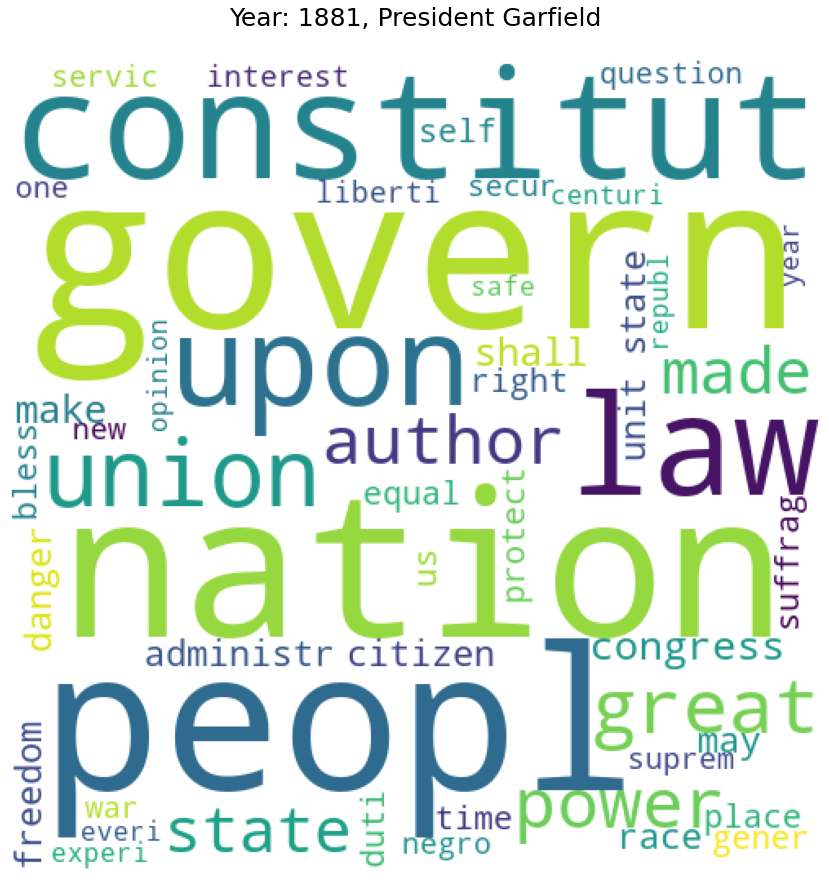

In [ ]:
import random

i = random.choice(df.index)

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=50,
                      width=500,height=500,
                      ).generate(' '.join(df.loc[i].text))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.title('Year: {}, President {}\n'.format(df.loc[i].year,df.loc[i].president), {'fontsize':25})
plt.axis('off')
plt.show()

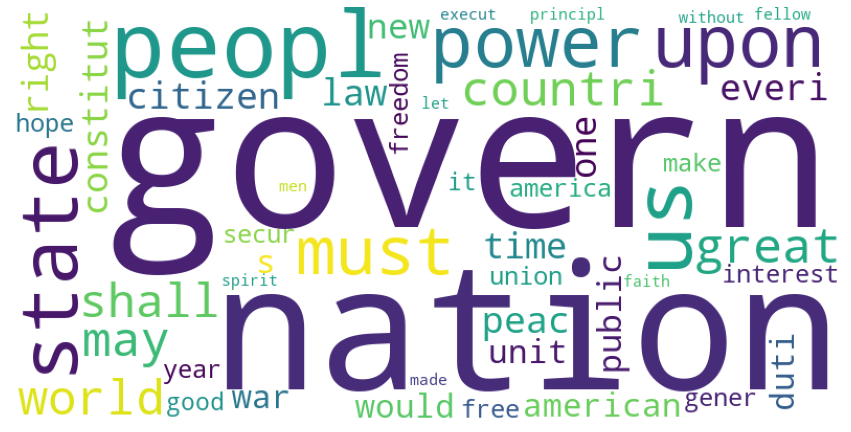

In [ ]:
# All tokens

all_tokens = df.text.sum()

all_tokens = dict(collections.Counter(all_tokens))

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=50,
                      width=800,height=400,
                      ).generate_from_frequencies(all_tokens)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Document Representation
- Count Vectorizer
- Binary Vectorizer
- TF_IDF
- Cosine Similarity

### Create sample data

In [ ]:
import pandas as pd
import numpy as np

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df.head()


,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food


### Count Vectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(corpus_df.Document[:100]) #top 100 documents
cv_matrix = cv_matrix.toarray()


In [ ]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,bacon,beans,beautiful,blue,breakfast,brown,but,dog,eggs,fox,green,ham,has,is,jumps,king,lazy,love,over,quick,sausages,sky,the,this,toast,today,very
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0
3,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5,1,0,0,0,1,0,1,0,1,0,1,0,0,0,2,0,0,1,0,0,1,0,0,2,0,0,0,0
6,1,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,2,0,0,1,2
7,0,0,0,0,0,0,1,1,1,0,1,0,0,0,2,0,0,1,0,0,1,0,0,2,0,0,0,0


### Binary vectorizer

In [ ]:
cv = CountVectorizer(min_df=0., max_df=1.,binary=True)
cv_matrix = cv.fit_transform(corpus_df.Document[:100]) #top 100 documents
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,bacon,beans,beautiful,blue,breakfast,brown,but,dog,eggs,fox,green,ham,has,is,jumps,king,lazy,love,over,quick,sausages,sky,the,this,toast,today,very
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0
3,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
6,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1
7,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0


###TF_IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(corpus_df.Document[:100])
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,bacon,beans,beautiful,blue,breakfast,brown,but,dog,eggs,fox,green,ham,has,is,jumps,king,lazy,love,over,quick,sausages,sky,the,this,toast,today,very
0,0.32,0.00,0.00,0.47,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47,0.36,0.00,0.00,0.0,0.0
1,0.27,0.00,0.00,0.39,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.39,0.00,0.54,0.00,0.0,0.0
2,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.41,0.00,0.30,0.00,0.41,0.30,0.00,0.00,0.46,0.00,0.00,0.0,0.0
3,0.18,0.30,0.35,0.00,0.00,0.35,0.00,0.00,0.00,0.30,0.00,0.00,0.30,0.35,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.35,0.0,0.0
4,0.23,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.46,0.38,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.0,0.0
5,0.20,0.00,0.00,0.00,0.26,0.00,0.29,0.00,0.29,0.00,0.29,0.00,0.00,0.00,0.51,0.00,0.00,0.29,0.00,0.00,0.29,0.00,0.00,0.45,0.00,0.00,0.0,0.0
6,0.15,0.00,0.00,0.22,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.34,0.00,0.00,0.3,0.6
7,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.39,0.28,0.00,0.28,0.00,0.00,0.00,0.50,0.00,0.00,0.28,0.00,0.00,0.28,0.00,0.00,0.44,0.00,0.00,0.0,0.0


### Document Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.592497,0.167270,0.056604,0.073640,0.541928,0.704836,0.362454
1,0.592497,1.000000,0.000000,0.047703,0.236620,0.142703,0.360920,0.000000
2,0.167270,0.000000,1.000000,0.000000,0.000000,0.645455,0.155793,0.627881
3,0.056604,0.047703,0.000000,1.000000,0.493841,0.035512,0.026360,0.000000
4,0.073640,0.236620,0.000000,0.493841,1.000000,0.046201,0.034294,0.000000
5,0.541928,0.142703,0.645455,0.035512,0.046201,1.000000,0.425888,0.869431
6,0.704836,0.360920,0.155793,0.026360,0.034294,0.425888,1.000000,0.337583
7,0.362454,0.000000,0.627881,0.000000,0.000000,0.869431,0.337583,1.000000


#Exercise 3

### Downloading Dataset

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fLhIxV3I2Md89qFOEJketjncU9LpnhkO' -O "text_file.csv"

--2021-11-17 16:29:28--  https://docs.google.com/uc?export=download&id=1fLhIxV3I2Md89qFOEJketjncU9LpnhkO
Resolving docs.google.com (docs.google.com)... 173.194.193.102, 173.194.193.139, 173.194.193.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.193.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hs8k3nls5dsgiodgm6srpv7i2unufij5/1637166525000/03946300571555492167/*/1fLhIxV3I2Md89qFOEJketjncU9LpnhkO?e=download [following]
--2021-11-17 16:29:28--  https://doc-08-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hs8k3nls5dsgiodgm6srpv7i2unufij5/1637166525000/03946300571555492167/*/1fLhIxV3I2Md89qFOEJketjncU9LpnhkO?e=download
Resolving doc-08-30-docs.googleusercontent.com (doc-08-30-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to doc-08-30-docs.googleusercontent.com (doc-08

### Loading Data

In [ ]:
import pandas as pd
data=pd.read_csv("text_file.csv",delimiter='\t',header=None,names=['id','title','abstract'])
data.head(10)

,id,title,abstract
0,95369245 TI,IL-2 gene expression and NF-kappa B activation...,Activation of the CD28 surface receptor provid...
1,95333264 TI,The peri-kappa B site mediates human immunodef...,Human immunodeficiency virus type 2 ( HIV-2 ) ...
2,95343554 TI,E1A gene expression induces susceptibility to ...,Adenovirus ( Ad ) infection and E1A transfecti...
3,95347379 TI,Distinct signaling properties identify functio...,The CD4 coreceptor interacts with non-polymorp...
4,95280913 TI,Ligand-dependent repression of the erythroid t...,High-dose estrogen administration induces anem...
5,95256242 TI,Mouse interleukin-2 receptor alpha gene expres...,We have shown that interleukin-1 ( IL-1 ) and ...
6,95338146 TI,Hematopoietic lineage commitment : role of tra...,This review focuses on the roles of transcript...
7,95266275 TI,Epstein-Barr virus replicative gene transcript...,Epstein-Barr virus ( EBV ) is known to infect ...
8,95236292 TI,Identification and purification of human Stat ...,A key cytokine induced during the immune respo...
9,95197524 TI,"E2F-1 and a cyclin-like DNA repair enzyme , ur...",The cell cycle-dependent transcription factor ...


In [ ]:
def tfidfBinary(text):  
  tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True, binary=True)
  tv_matrix = tv.fit_transform(text)
  return tv.get_feature_names(), tv_matrix.toarray(), tv


vocabBinary, binary_representation, binary_vectorizer = tfidfBinary(data.abstract)

pd.DataFrame(np.round(binary_representation, 2), columns=vocabBinary)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00005,00009,0001,0002,0004,0005,0006,0007,0008,0009,001,0014,002,0023,003,0035,0048,005,006,007,0081,009,01,010,011,0112,0126,016,02,0201,025,029,0291,03,034,0354,04,...,zearalenone,zeb,zebra,zebrafish,zeichner,zero,zeta,zfh,zfp36,zhang,zi,zidovudine,zif,zii,zileuton,zimmerman,zinc,zip,zipper,zippers,zk157202,zk161422,zlf,zn,zn2,zona,zone,zones,zoster,zp,zpcat,zr,zre,zta,zvad,zxda,zxdb,zymogen,zymography,zymosan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def tfidfBinaryNgram(text):  
  tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True, binary=True, ngram_range=2)
  tv_matrix = tv.fit_transform(text)
  return tv.get_feature_names(), tv_matrix.toarray(), tv

In [ ]:
vocabNGram, n_gram_representation, n_gram_vectorizer = tfidfBinary(data.abstract)

pd.DataFrame(np.round(n_gram_representation, 2), columns=vocabNGram)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00005,00009,0001,0002,0004,0005,0006,0007,0008,0009,001,0014,002,0023,003,0035,0048,005,006,007,0081,009,01,010,011,0112,0126,016,02,0201,025,029,0291,03,034,0354,04,...,zearalenone,zeb,zebra,zebrafish,zeichner,zero,zeta,zfh,zfp36,zhang,zi,zidovudine,zif,zii,zileuton,zimmerman,zinc,zip,zipper,zippers,zk157202,zk161422,zlf,zn,zn2,zona,zone,zones,zoster,zp,zpcat,zr,zre,zta,zvad,zxda,zxdb,zymogen,zymography,zymosan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Binary tf idf
i = random.choice(data.index)

query = data.loc[i].title

print('QUERY: {}'.format(query))


v_query = binary_vectorizer.transform([query])
# Most similar document to the query:

results = cosine_similarity(binary_representation, v_query)

QUERY: Cellular redox status influences both cytotoxic and NF-kappa B activation in natural killer cells . AB 


array([[1526],
       [1630],
       [1773],
       ...,
       [1315],
       [ 883],
       [1244]])

In [ ]:
for i in results.argsort(axis=0)[-5:][::-1]:
  print(i)
  print('TITLE: {}\nABSTRACT: {}'.format(data.iloc[i]['title'], data.iloc[i]['abstract']))

[1244]
TITLE: 1244    Cellular redox status influences both cytotoxi...
Name: title, dtype: object
ABSTRACT: 1244    The role of cellular redox status in both cyto...
Name: abstract, dtype: object
[883]
TITLE: 883    Fas ligand induction in human NK cells is regu...
Name: title, dtype: object
ABSTRACT: 883    Fas ligand ( FasL ) on cytotoxic lymphocytes i...
Name: abstract, dtype: object
[1315]
TITLE: 1315    Down-regulation of human granzyme B expression...
Name: title, dtype: object
ABSTRACT: 1315    The serine protease granzyme B is an essential...
Name: abstract, dtype: object
[1480]
TITLE: 1480    Targeted disruption of the MyD88 gene results ...
Name: title, dtype: object
ABSTRACT: 1480    MyD88 , originally isolated as a myeloid diffe...
Name: abstract, dtype: object
[1007]
TITLE: 1007    HIV-1 Vpr suppresses immune activation and apo...
Name: title, dtype: object
ABSTRACT: 1007    The HIV-1 accessory gene product Vpr can influ...
Name: abstract, dtype: object


In [ ]:
# Bi-gram tf idf

print('QUERY: {}'.format(query))


v_query = n_gram_vectorizer.transform([query])
# Most similar document to the query:

results = cosine_similarity(n_gram_representation, v_query)


QUERY: Cellular redox status influences both cytotoxic and NF-kappa B activation in natural killer cells . AB 


In [ ]:
for i in results.argsort(axis=0)[-5:][::-1]:
  print(i)
  print('TITLE: {}\nABSTRACT: {}'.format(data.iloc[i]['title'], data.iloc[i]['abstract']))

[1244]
TITLE: 1244    Cellular redox status influences both cytotoxi...
Name: title, dtype: object
ABSTRACT: 1244    The role of cellular redox status in both cyto...
Name: abstract, dtype: object
[883]
TITLE: 883    Fas ligand induction in human NK cells is regu...
Name: title, dtype: object
ABSTRACT: 883    Fas ligand ( FasL ) on cytotoxic lymphocytes i...
Name: abstract, dtype: object
[1315]
TITLE: 1315    Down-regulation of human granzyme B expression...
Name: title, dtype: object
ABSTRACT: 1315    The serine protease granzyme B is an essential...
Name: abstract, dtype: object
[1480]
TITLE: 1480    Targeted disruption of the MyD88 gene results ...
Name: title, dtype: object
ABSTRACT: 1480    MyD88 , originally isolated as a myeloid diffe...
Name: abstract, dtype: object
[1007]
TITLE: 1007    HIV-1 Vpr suppresses immune activation and apo...
Name: title, dtype: object
ABSTRACT: 1007    The HIV-1 accessory gene product Vpr can influ...
Name: abstract, dtype: object
